# Classifying texts

## The Bag-of-Words model

A classifier receives as input a vector of observations, which we will call $x$. This vector describes the content of an item of a dataset. The classifier uses $x$ to estimate a vector $y$ that represents the probability that the corresponding item belongs to each one of the $N$ known classes, that is:

$$
y = y(x) = \{P(C=c_n | x)\} =\{ P(C=c_1 | x), P(C=c_2 | x), \cdots, P(C=c_N | x)\} 
$$

For example: suppose we are trying to classify books into the categories "romance" and "fantasy". Then, we should somehow estimate a vector $x$ for each book in our collection (or: for each *item* in our *dataset*). After that, we have to find out some way to make a function that estimates $y$. Finally, each item in the dataset will be related to a vector of probabilities $y$. The components of $y$ can be interpreted as probabilities, e.g., $y=[0.2,0.8]$ means that the corresponding item has $20\%$ probability of being from class 1 (in our case: romance) and $80\%$ probability of being from class 2 (in our case: fantasy).

### Estimating statistics from data

The formulation we just saw assumes that $x$ is something we can measure from data. In many cases, measures are precise. For example, we can measure the age of a person without error. However, in most classification problems, our measures have many aspects we cannot account for. For example, it is very likely that mango trees have an expected height, but that expected value will not correspond exactly to any particular mango trees. Instead, we expect to see a distribution around it. It could be reasonable, in this case, to think about a Normal distribution with estimated mean and variances.

Likewise, in the case of texts, we should think about what is possible to measure and what is not possible to measure.

One thing we *can* measure very precisely is whether a particular text contains a particular word - we have done this several times, already!

Also, we can very precisely *count* how many documents in a collection contain a particular word.

But, see, our classification problem concerns documents we have never seen before. This is a bit paradoxical: the best way to check if a book is "romance" or "fiction" is to have a full list of all "romance" and "fiction" books, and find our book there. However, the classification problem focuses in a situation in which we are looking at a new (never-seen-before) book. Perhaps we just wrote a book and want to know where to sell it? Perhaps we want to know if the book strongly fits one of these genres?

Of course, we cannot possibly have a catalogue including books that are yet to be written. So, we should make a model as to how a book in a particular genre behaves. This type of model is called a "generative" model (although nowadays the word "generative" is being used for other things as well).

In a generative model, we assume that there is a probability distribution that generates new books from a particular genre. Hence, a particular book is a *sample* of that distribution. Now, we have to *estimate* the distribution parameters!

If we want to estimate the distribution *parameters*, we first have to choose its shape. To make this choice, we should look at:

1. The things we can measure
1. What models make sense for it

For example, we can measure if a particular book contains a particular word. If we assume that books from a genre are written independently, and that the words chosen in each book are independent from each other (these are naive assumptions...), then a book containing a word behaves very similarly to tossing a biased coin.

Yes.

We are talking about a [Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution) here.

The advantage of assuming a Bernoulli distribution is that we can import all the theory underlying it to our problem. Of course, the disadvantage of assuming anything is that we have made some concessions regarding how literature works, in special about the independence aspect. Thus, we will have the problem of finding out how much these assumptions have harmed our model.

Before that, we should remember how the Bernoulli distribution works.

The Bernoulli distribution describes a process that has two outcomes (typically: heads and tails in a coin toss).

## Exercise 1

Which of the phenomena below could be modelled using a Bernoulli distribution?

1. Flipping a coin and recording whether it lands on heads (1) or tails (0). Y
1. Rolling a die and recording whether the result is a 4. Y
1. Measuring the height of students in a classroom. N
1. Determining whether a light bulb is functional or not (on or off). Y
1. Surveying whether a person votes in an election (yes or no). Y
1. the number of cars passing through an intersection in one hour. N
1. Determining if a customer makes a purchase or not.  Y
1. Measuring the temperature outside every hour. N
1. Checking whether a software test passes or fails. Y
1. Checking how if a book contains the word "dragon" Y

## Exercise 2: reviewsing the Bayes rule

The Bayes Rule, or the Bayes Theorem, regards the idea of inverting conditionals. A conditional probability is a probability calculated under the assumption of something being known. We write it as $P(A|B)$, which is read: "probability of $A$ given $B$". In real life, we live situations like that all the time. For example, there is a probability that any day, picked at random, is rainy. However, if we pick any day in which we know everyone is using umbrellas, then the probability of picking a rainy day is different, that is, $P(\text{rain}) \neq P(\text{rain} | \text{everyone is using umbrellas})$.
  
We can use the diagram above to calculate the probability of $A$ given $B$. In this case, we need to compute all favorable and possible events (which is $A \cap B$, because we *know* $B$ happens) and divide by all possible events (which is $B$, as we *know* $B$ happens). Hence, the conditional can be written as:

$$
P(A | B) = \frac{P(A \cap B)}{P(B)}
$$

We can use a similar reasoning to find that:

$$
P(B | A) = \frac{P(B \cap A)}{P(A)}
$$

Since $A \cap B = B \cap A$, we can rewrite the equations above as:

$$
P(A|B)P(B) = P(A \cap B) =  P(B|A)P(A) 
$$

This is the Bayes rule.

**Question**

If $P(A) = 0.5$, $P(B) = 0.25$, $P(A \cap B)=0.1$, what is $P(A|B)$? What is $P(B|A)$?

## Exercise 3: applying the Bayes rule

We are going to use the Bayes rule to estimate a likelihood of a document being from a particular class -- or, in our example, of a movie being of a particular genre -- given that it contains a word we choose. Let's start with the word "funny". 

As I write this text, I wonder that comedy and drama plots probably have different probabilities of having the word "funny", hence:

$$
P(\text{funny} | \text{comedy}) \neq P(\text{funny} | \text{drama})
$$

The good news about the probabilities above is that we can estimate them by counting, like we did in the Models section. For such, we get all the plots each genre and estimate the probability of using the word "funny":
 

 
def has_word(word, text):
    import re
    tokens = re.findall(r'\w+', text.lower())
    ret = word.lower() in tokens
    return ret

def P_word_given_genre(word, genre):
    if genre is not None:
        genre_df = df[df['Genre'] == genre]
    else:
        genre_df = df
    genre_has_word = genre_df['Plot'].apply(lambda x: has_word(word, x)).astype(int)
    ret  =genre_has_word.mean()
    return ret

word = "funny"
P_word_given_drama = P_word_given_genre(word, 'drama')
P_word_given_comedy = P_word_given_genre(word, 'comedy')

print(P_word_given_comedy, P_word_given_drama)
 

 
The quantities we calculated are $P(\text{funny} | \text{comedy})$ and $P(\text{funny} | \text{drama})$. However, we are interested in estimated the probability of a plot belonging to a genre given that we *know* that they contain (or not) that particular word. We can *know* that because we can precisely measure it from data, whereas we cannot measure the "genre" of a plot from data.

We can use Bayes' rule and state that:

$$
P(\text{comedy} | \text{funny} ) = \frac{P(\text{funny} | \text{comedy}) P(\text{comedy})}{P(\text{funny})}
$$

where:

* $P(\text{funny})$ is the probability that the word "funny" appears in a random text from the collection, and
* $P(\text{comedy})$ is the probability that a random text from the collection is of the comedy genre.
    
Using the data found [here](https://raw.githubusercontent.com/tiagoft/NLP/main/wiki_movie_plots_drama_comedy.csv), estimate the probabilities below:

1. $P(\text{comedy})$
1. $P(\text{drama})$
1. $P(\text{funny})$
1. $P(\text{comedy} | \text{funny})$
1. $P(\text{drama} | \text{funny})$
1. $P(\text{comedy} | \overline{\text{funny}})$ (that is, probability of genre being comedy given that the word "funny" is *not* in the text)
1. $P(\text{drama} | \overline{\text{funny}})$ (that is, probability of genre being drama given that the word "funny" is *not* in the text)



In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/tiagoft/NLP/main/wiki_movie_plots_drama_comedy.csv')
df.head()

,Plot,Genre
0,The film is about a family who move to the sub...,comedy
1,Before heading out to a baseball game at a nea...,comedy
2,The plot is that of a black woman going to the...,comedy
3,On a beautiful summer day a father and mother ...,drama
4,A thug accosts a girl as she leaves her workpl...,drama


In [2]:
# calculate the probality of each genre
df['Genre'].value_counts(normalize=True)

Genre
drama     0.576622
comedy    0.423378
Name: proportion, dtype: float64

In [3]:
# calculate the probality of the word funny appearing in the plot
df['Funny'] = df['Plot'].str.contains('funny', case=False)
df['Funny'].mean()

np.float64(0.004640819878178478)

In [4]:
df.head()

,Plot,Genre,Funny
0,The film is about a family who move to the sub...,comedy,False
1,Before heading out to a baseball game at a nea...,comedy,False
2,The plot is that of a black woman going to the...,comedy,False
3,On a beautiful summer day a father and mother ...,drama,False
4,A thug accosts a girl as she leaves her workpl...,drama,False


## Exercise 4: the Naive Bayes approach

To deal with many words, we are going to *naively* assume that the presence or absense of each word is independent of each other. This is naive because obviously texts that refer to "dragons" are more likely to refer to "sorcerers", and so on. However, the assumption of independence is interesting because, if many processess are independent, then:

$$
P(A_1, A_2, \cdots, A_n) = P(A_1)P(A_2) \cdots P(A_n)
$$

We can apply this to the conditional case, with many words $w_1 \cdots w_n$ and a class $C$:

$$
P(w_1, w_2, \cdots, w_n | C ) = P(w_1 | C)P(w_2 | C) \cdots P(w_n|C)
$$

Using the Bayes rule, we have that:

$$
P(C | w_1, w_2, \cdots, w_n) = \frac{P(w_1, w_2, \cdots, w_n | C ) P(C)}{P(w_1, w_2, \cdots, w_n )}
$$

Hence:

$$
P(C | w_1, w_2, \cdots, w_n) = \frac{(P(w_1 | C)P(w_2 | C) \cdots P(w_n|C)) P(C)}{P(w_1) P(w_2) \cdots P(w_n)}
$$

We can estimate $P(w_i | C)$ and $P(w_i)$ for each word in the dataset following the same ideas as before.

Using the data found [here](https://raw.githubusercontent.com/tiagoft/NLP/main/wiki_movie_plots_drama_comedy.csv), estimate the probabilities below. First, use the exact estimation method. Then, do the same with the naive Bayes assumption.

1. $P(\text{comedy} | \text{funny}, \text{sad})$
1. $P(\text{comedy} | \overline{\text{funny}}, \text{sad})$
1. $P(\text{comedy} | \text{funny}, \overline{\text{sad}})$
1. $P(\text{comedy} | \overline{\text{funny}}, \overline{\text{sad}})$
1. $P(\text{drama} | \text{funny}, \text{sad})$
1. $P(\text{drama} | \overline{\text{funny}}, \text{sad})$
1. $P(\text{drama} | \text{funny}, \overline{\text{sad}})$
1. $P(\text{drama} | \overline{\text{funny}}, \overline{\text{sad}})$


## Exercise 5: using sklearn

# Implementation with Sklearn

It is obvious that we are not going to code Naive Bayes from scratch every time. Instead, let's use `sklearn` and its potential to help us. Let's check an example code:
 


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

SEED = 42

X_train, X_test, y_train, y_test = train_test_split(df['Plot'], df['Genre'], test_size=0.2, random_state=SEED)
 
# After that, we will transform our data so that each text becomes a vector, similarly to the TFIDF vectorization process. Thus, our dataset becomes a matrix $N \times V$ where $N$ is the number of documents in the dataset and $V$ is our vocabulary size:
    
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(binary=True) # binary=True means that we are only interested in whether a word appears in a document or not
X_train_matrix = vect.fit_transform(X_train)
X_test_matrix = vect.transform(X_test)

#print(X_train_matrix)
 
# Now, we use a Naive Bayes model and fit its parameters to our data:
 
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(X_train_matrix, y_train)
 
# Last, we use the model to make predictions and evaluate its accuracy:
 
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test_matrix)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
 

Accuracy: 0.73


** Questions **

1. When you run the code above, what is the accuracy you got?
1. Why do we need the parameter `binary=True` in `CountVectorizer` if we use the `BernoulliNB()` model?
1. What happens to the accuracy if you change `test_size` to a larger value in the `train_test_split`, like `0.9`?

# Exercise 6: using a Pipeline

We can observe that the processes of vectorizing and modelling with Naive Bayes form a pipeline, that is, a sequence of steps similar to a production line. We can further improve our code using the Pipeline class from sklearn:

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create the pipeline
model = Pipeline([
    ('vectorizer', CountVectorizer(binary=True, stop_words='english')),
    ('classifier', BernoulliNB())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Plot'], df['Genre'], test_size=0.2, random_state=SEED)
# Train the pipeline
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.73


1. Is the result from the code above strictly the same as in the one in Exercise 5?
1. What happens if you change the `CountVectorizer()` parameters to exclude stop words, and use `min_df` and `max_df`?

## Exercise 7: Term Frequency

So far, we are using the Bernoulli model for our Naive Bayes classifier. It assumes that the *presence* of a word in a document is what determines its class. However, we could assume that the *number of times* a word appears in a text is also linked to its class. In this case, we cannot use a Bernoulli model for our probabilities - instead, we will need a Multinomial distribution.

The number of times a term appear within a text is usually called Term Frequency (TF). Words with higher Term Frequency are usually more important *within that document*, but not necessarily important over the whole collection.

Start from one of the classifier codes above, and make the following changes:

1. Change the parameters in `CountVectorizer` so that `binary=False`
1. Change the `BernoulliNB` classifier to a `MultinomialNB` counterpart. 
1. Evaluate the resulting classification pipeline. Did we get any increase in accuracy?


In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create the pipeline
model = Pipeline([
    ('vectorizer', CountVectorizer(binary=False, stop_words='english')),
    ('classifier', MultinomialNB())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Plot'], df['Genre'], test_size=0.2, random_state=SEED)
# Train the pipeline
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.77


## Exercise 8: Logistic Regression

One important method for classification in texts is the Logistic Regression.

Logistic Regression begins with a linear prediction. In linear prediction, we have a vector of features $x = [x_1, x_2, \cdots, x_{N}]$ and we multiply them, one by one, by corresponding coefficients $[\beta_1, \beta_2, \cdots, \beta_{N}]$. We add the results. Then, we further add a bias factor $\beta_0$. In the end, we get to something like:

$$
z = \beta_0 + \sum_{n=1}^N x_n \beta_n
$$

Importantly, we can rewrite this as a matrix multiplication:

$$
z = \beta_0 + \begin{bmatrix} x_1 & x_2 & \cdots & x_n\end{bmatrix} \begin{bmatrix} \beta_1 \\ \beta_2 \\ \vdots \\ \beta_n\end{bmatrix}
$$

Logistic Regression takes a step further by applying a logistic function to $z$. A logistic function is usually:

$$
y(z) = \frac{1}{1+e^{-z}}
$$

Interact with the code below to find an example of what happens with a logistic regression when we change parameters

In [20]:
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

import matplotlib.pyplot as plt

# Generate some sample data
np.random.seed(42)
x1 = 0
x2 = 0
beta1 = 5
beta2 = -3
beta0 = 1
# Function to update the scatter plot
def update_plot(x1, x2, beta1, beta2, beta0):
    plt.figure(figsize=(10, 3))
    plt.subplot(1, 2, 1)
    plt.scatter(x1, x2, c='blue', label='Data')
    plt.xlim([-2,2])
    plt.ylim([-2,2])
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title('$x$')
    
    x = np.array([[x1, x2]])
    w = np.array([[beta1, beta2]]).T
    z = beta0 + x@w
    z = z[0,0]
    y = 1 / (1 + np.exp(-z))
    
    z_line = np.linspace(-5, 5, 100)
    y_line = 1/(1 + np.exp(-z_line))
    
    plt.subplot(1, 2, 2)
    plt.plot(z_line, y_line, c='blue', label='Logistic Function')
    plt.scatter(z, y, c='red', label='Prediction')
    plt.xlim([-5,5])
    plt.ylim([-1.5,1.5])
    plt.xlabel('$z$')
    plt.ylabel('$y$')
    plt.title(f'$z = {z:.2f}$, $y = {y:.2f}$')
    plt.tight_layout()
    plt.show()

# Create interactive widgets
x1_slider = widgets.FloatSlider(min=-2, max=2, step=0.01, value=0.5, description='x1')
x2_slider = widgets.FloatSlider(min=-2, max=2, step=0.01, value=0.5, description='x2')
beta1_slider = widgets.FloatSlider(min=-2, max=2, step=0.01, value=0.5, description='b1')
beta2_slider = widgets.FloatSlider(min=-2, max=2, step=0.01, value=0.5, description='b2')
beta0_slider = widgets.FloatSlider(min=-2, max=2, step=0.01, value=0.5, description='b0')

# Use interact to create the interactive plot
interact(update_plot, x1=x1_slider, x2=x2_slider, beta1=beta1_slider, beta2=beta2_slider, beta0=beta0_slider)

interactive(children=(FloatSlider(value=0.5, description='x1', max=2.0, min=-2.0, step=0.01), FloatSlider(valu…

<function __main__.update_plot(x1, x2, beta1, beta2, beta0)>

### More on the Logistic Function

The calculation of the output $y$ using a logistic function is because of the following:

1. It gives values between 0 and 1, so it can be interpreted as a probability
1. It is continuous, hence it has a derivative
1. Because it has a derivative, we can fit the model using a gradient descent algorithm

The first point is the most important here. The results of a logistic regression can be interpreted as $P(\text{class} | \text{data})$, which is very useful for us. Remember that in Naive Bayes we had that whole process of finding the intermediate probabilities, and then using the Bayes Theorem to get to this posterior probability? In Logistic Regression, we go straight to the posterior, without intermediate steps.

However, Logistic Regression needs each element of the dataset to be represented as vectors, and so far we are talking about words. Well, worry not! We are actually already representing our movie plots as vectors! When we identify the words that are present in our text, we are implicitly defining a vector in which each index corresponds to a a word, and a value $1$ means the corresponding word is present, and $0$ means it is not present.

Logistic Regression can be quickly implemented using `sklearn` as:

Accuracy: 0.78


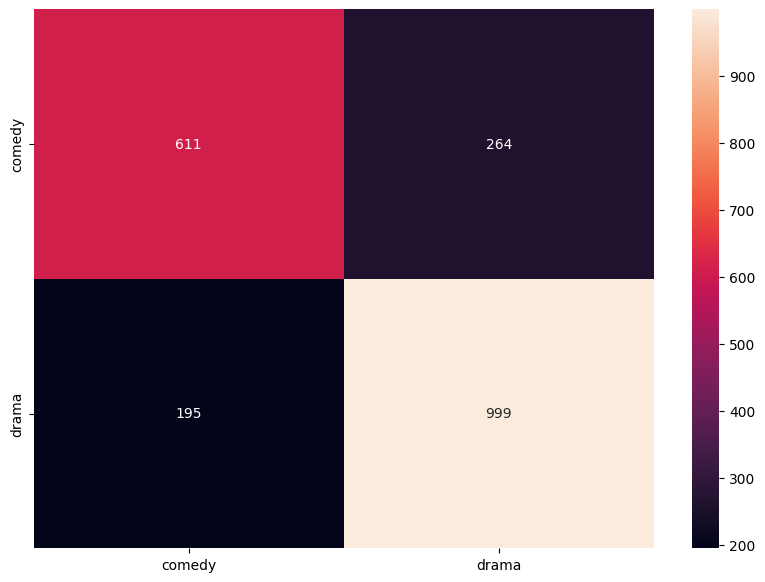

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

model_lr = Pipeline([
    ('vectorizer', CountVectorizer(binary=True, stop_words='english')),
    ('classifier', LogisticRegression())
])

model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

# plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model_lr.classes_, yticklabels=model_lr.classes_)
plt.show()

**Question**

Try to classify movie plots using the Logistic Regression. Do you find an increase in accuracy?

## Exercise 8: TF-IDF

So far, we have been using the `CountVectorizer` for our classification. It essentially gives us the Term Frequency (TF) for each word in each document. Hence, it gives us an idea of the importance of each term for each document.

However, it ignores the relative importance of each term for the whole collection. Such an importance can be measured by the Document Frequency (DF). A term with low DF tends to be more rare, thus it tends to be more relevant to a document.

A measure that accounts for both TF and DF is called TFIDF, which stands for Term-Frequency-Inverse-Document-Frequency. Essentially:

$$
\text{TFIDF} = \frac{TF}{DF}.
$$

However, nowadays there are many regularization elements applied to TFIDF. Check the [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) for some examples.

We can use a TFIDF vectorizer to replace the `CountVectorizer`. For such, simply change the CountVectorizer to a `TfidfVectorizer` in our usual pipeline (don't forget to import the library - check the documentation above if you need more help!).

What happens to the classification accuracy?

Accuracy: 0.76


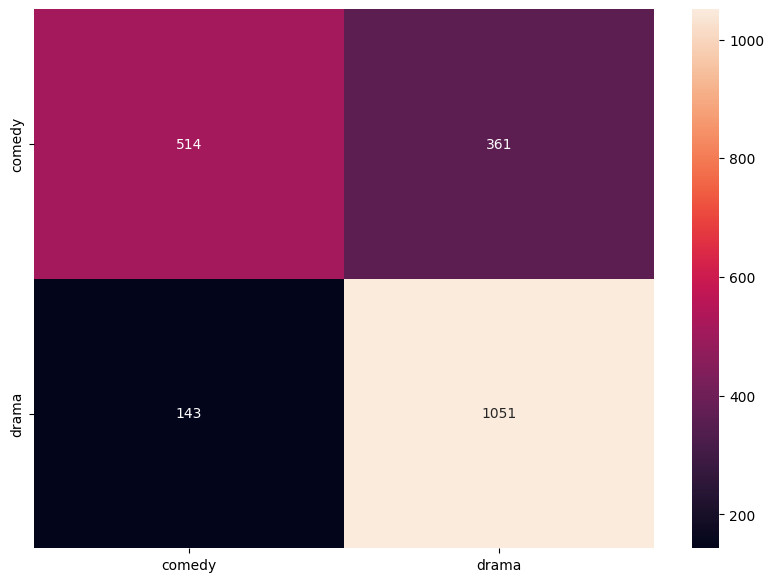

In [36]:
# Solve the exercise hfrom sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

model_lr = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english')),
    ('classifier', LogisticRegression())
])

model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

# plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model_lr.classes_, yticklabels=model_lr.classes_)
plt.show()

## Exercise 9: Using an LLM

But, why would we need to train a system, then use a classifier, and study all of that, if we can simply ask an LLM to do it? It could be as simple as:

In [37]:
import os
from dotenv import load_dotenv
import google.generativeai as genai

load_dotenv()

X = df.iloc[1]['Plot']
y = df.iloc[1]['Genre']

GEMINI_API_KEY = os.getenv('GEMINI_API_KEY')
#GEMINI_API_KEY = # Go to https://aistudio.google.com/ to get a key. DO NOT commit your key to the repository!

# Start the use of the API
genai.configure(api_key=GEMINI_API_KEY)

# Make our prompt here
prompt = f"Classify this movie plot: {X} as either comedy or drama. Reply with a single word stating either COMEDY or DRAMA, in all caps."
generation_config = genai.GenerationConfig(
    max_output_tokens=5,
    temperature=0.0,
)

# Use our prompt 
model = genai.GenerativeModel(model_name="gemini-1.5-flash")

response = model.generate_content(prompt,
                                  generation_config=generation_config)
print(f"Response: {response.text}\nExpected: {y}")

Response: COMEDY

Expected: comedy


Try to replicate the results we obtained with the Logistic Regression system using LLMs. 

For such, you will need to write a small system that reads the response and retriever whether the response was "comedy" or "drama". Also, you might want to test the system with only a few entries, so you can save on using the API.


Try to use the API to classify the entire test set
y_pred = []
for X in X_test:
    prompt = f"Classify this movie plot: {X} as either comedy or drama. Reply with a single word stating either COMEDY or DRAMA, in all caps."
    response = model.generate_content(prompt,
                                      generation_config=generation_config)
    y_pred.append(response.text)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model_lr.classes_, yticklabels=model_lr.classes_)
plt.show()

